In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/CNN course/data')

#Data downloaded from: http://ufldl.stanford.edu/housenumbers/

In [2]:
from __future__ import print_function, division
from builtins import range

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.utils import shuffle
from datetime import datetime

def y2indicator(y):
    N = len(y)
    ind = np.zeros((N, 10))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

def error_rate(p, t):
    return np.mean(p != t)

def flatten(X):
    #input dim - (32, 32, 3, N)
    #Output will be (N, 3072)
    N = X.shape[-1]
    flat = np.zeros(((N, 3072)))
    for i in range(N):
        flat[i] = X[:,:,:,i].reshape(3072)
    return flat

def get_data():
    train = loadmat('/content/drive/My Drive/Colab Notebooks/Lazy courses/CNN course/data/train_32x32.mat')
    test = loadmat('/content/drive/My Drive/Colab Notebooks/Lazy courses/CNN course/data/test_32x32.mat')
    return train, test

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Cost / err at iteration i=0, j=0: 1536528.250 / 0.924
Cost / err at iteration i=0, j=10: 10892044.000 / 0.939
Cost / err at iteration i=0, j=20: 2223084.250 / 0.804
Cost / err at iteration i=0, j=30: 3771118.500 / 0.908
Cost / err at iteration i=0, j=40: 1590523.125 / 0.922
Cost / err at iteration i=0, j=50: 1791644.625 / 0.889
Cost / err at iteration i=0, j=60: 1186720.000 / 0.841
Cost / err at iteration i=0, j=70: 960827.375 / 0.935
Cost / err at iteration i=0, j=80: 948770.375 / 0.889
Cost / err at iteration i=0, j=90: 671842.625 / 0.922
Cost / err at iteration i=0, j=100: 496259.188 / 0.849
Cost / err at iteration i=0, j=110: 452472.844 / 0.923
Cost / err at iteration i=0, j=120

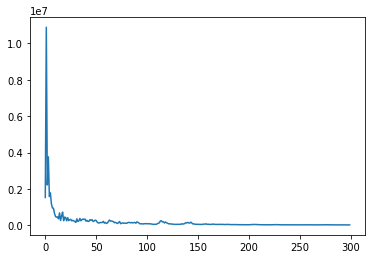

In [3]:
def main():
    train, test = get_data()

    #scaling the images (X), and, Y is Nx1 matrix from 1-10 in matlab, need to change to 0-9
    Xtrain = flatten(train['X'].astype(np.float32) / 255)
    Ytrain = train['y'].flatten() - 1
    Xtrain, Ytrain = shuffle(Xtrain, Ytrain)
    Ytrain_ind = y2indicator(Ytrain)

    Xtest = flatten(test['X'].astype(np.float32) / 255)
    Ytest = test['y'].flatten() - 1
    Ytest_ind = y2indicator(Ytest)

    #gradient descent params
    max_iter = 20
    print_period = 10
    N, D = Xtrain.shape
    batch_sz = 500
    n_batches = N / batch_sz

    #initial weights
    M1 = 1000 #hidden layer size
    M2 = 500
    K = 10
    W1_init = np.random.randn(D, M1) / np.sqrt(D + M1)
    b1_init = np.zeros(M1)
    W2_init = np.random.randn(M1, M2)
    b2_init = np.zeros(M2)
    W3_init = np.random.randn(M2, 10) / np.sqrt(K + M2)
    b3_init = np.zeros(K)

    #define variables and expressions
    X = tf.placeholder(tf.float32, shape=(None, D), name='X')
    T = tf.placeholder(tf.float32, shape=(None, K), name='T')
    W1 = tf.Variable(W1_init.astype(np.float32))
    b1 = tf.Variable(b1_init.astype(np.float32))
    W2 = tf.Variable(W2_init.astype(np.float32))
    b2 = tf.Variable(b2_init.astype(np.float32))
    W3 = tf.Variable(W3_init.astype(np.float32))
    b3 = tf.Variable(b3_init.astype(np.float32))

    Z1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    Z2 = tf.nn.relu(tf.matmul(Z1, W2) + b2)
    Yish = tf.matmul(Z2, W3) + b3

    cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=Yish, labels=T))

    train_op = tf.train.RMSPropOptimizer(0.0001, decay=0.99, momentum=0.9).minimize(cost)

    predict_op = tf.argmax(Yish, 1)

    t0 = datetime.now()
    LL = []
    init = tf.global_variables_initializer()
    with tf.Session() as session:
        session.run(init)

        for i in range(max_iter):
            for j in range(int(n_batches)):
                Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
                Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]

                session.run(train_op, feed_dict={X: Xbatch, T:Ybatch})
                if j % print_period == 0:
                    test_cost = session.run(cost, feed_dict={X: Xtest, T: Ytest_ind})
                    prediction = session.run(predict_op, feed_dict={X: Xtest})
                    err = error_rate(prediction, Ytest)
                    print("Cost / err at iteration i=%d, j=%d: %.3f / %.3f" %(i, j, test_cost, err))
                    LL.append(test_cost)
    print("Elapsed time: ", (datetime.now() - t0))
    plt.plot(LL)
    plt.show()

if __name__ == '__main__':
    main()
